In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [7]:
dir = '../MachineL/data/'

data = pd.read_csv(dir+'Iris.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
data.shape

(150, 6)

In [12]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


DataFrame.size akan memberikan output berupa jumlah baris jika berupa series dan output berupa jumlah baris & kolom jika berupa tabel(datafram/matriks)

In [37]:
data.size

900

In [58]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [31]:
data.iloc[[1]]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [32]:
data.iloc[1]

Id                         2
SepalLengthCm            4.9
SepalWidthCm             3.0
PetalLengthCm            1.4
PetalWidthCm             0.2
Species          Iris-setosa
Name: 1, dtype: object

In [65]:
data.Species

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [66]:
data['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [51]:
data.loc[:,'Species'].value_counts()

(3,)

In [50]:
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [84]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

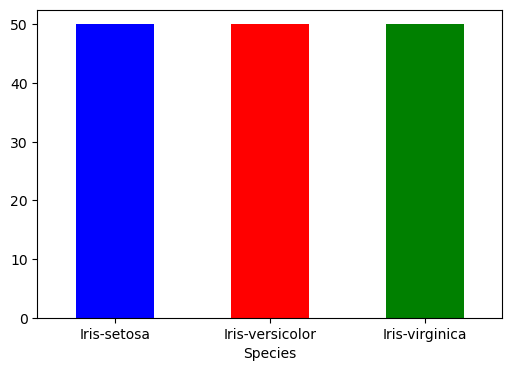

In [64]:
fig = plt.figure(figsize=(6,4))
data.loc[:,'Species'].value_counts().plot(kind='bar', color=['b','r','g'], rot=0)
#data.plot(kind='scatter', y='Species')
plt.show()

In [94]:
X = data.drop(['Species'], axis=1)

scaled_x = StandardScaler().fit_transform(X)

In [100]:
#data.Species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)
enc = LabelEncoder()
y = enc.fit_transform(data.Species)

In [95]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_x)


In [103]:
data_pca_df = pd.DataFrame(data=data_pca, columns=['pca1','pca2'])
label_dict = ['setosa', 'versicolor', 'virginica']

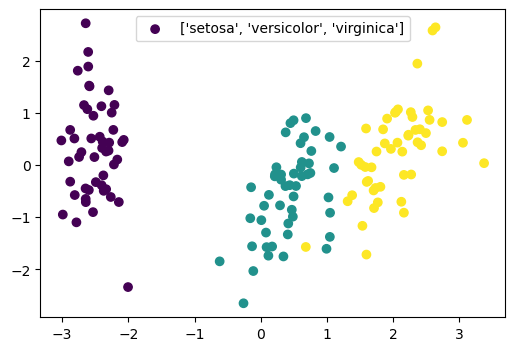

In [105]:
fig2 = plt.figure(figsize=(6,4))
plt.scatter(data_pca_df.pca1, data_pca_df.pca2, c=y)
plt.legend()
plt.show()